In [131]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [132]:
data = pd.read_csv('cardataset.csv')
data.columns

Index(['Unnamed: 0', 'Car_Name', 'Year', 'Selling_Price', 'Present_Price',
       'Kms_Driven', 'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

Dimension of Dataset 

In [133]:
data.shape

(301, 10)

In [134]:
data.drop('Unnamed: 0',axis = 1 , inplace = True)

In [135]:
data.drop('Car_Name',axis = 1, inplace = True)


In [136]:
data.head(5)

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


Dataset has 301 rows and 9 columns, its not possible to see the categories of categorical instances i.e. Fule Type , Seller Type , Trasnmission and Owner so lets print out the categories

In [137]:
for features in ['Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']:
    print(features,data[features].unique())

Fuel_Type ['Petrol' 'Diesel' 'CNG']
Seller_Type ['Dealer' 'Individual']
Transmission ['Manual' 'Automatic']
Owner [0 1 3]


In [138]:
data.isnull().sum()

Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

# Feature Engineering  


In [139]:
from datetime import date
data['No_of_Years'] =date.today().year - data['Year'] 

In [140]:
data.head(5)

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,No_of_Years
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


Now we dont need Year in which car was sold so we can drop the column

In [141]:
data.drop('Year', axis = 1 , inplace = True)

In [142]:
data.head(2)

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,No_of_Years
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,8


Lets see Descriptive Statistics of DataSet 

In [143]:
data.describe()

,Selling_Price,Present_Price,Kms_Driven,Owner,No_of_Years
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,4.661296,7.628472,36947.205980,0.043189,7.372093
std,5.082812,8.644115,38886.883882,0.247915,2.891554
min,0.100000,0.320000,500.000000,0.000000,3.000000
25%,0.900000,1.200000,15000.000000,0.000000,5.000000
50%,3.600000,6.400000,32000.000000,0.000000,7.000000
75%,6.000000,9.900000,48767.000000,0.000000,9.000000
max,35.000000,92.600000,500000.000000,3.000000,18.000000


We can see there is difference in Mean and Standard Deviation  in Kms_Driven and Present Price. This might cause because of Outliers. Outliers are the data points which posses abnormal behaviour as compared to our original data points. We can observe these outliers in graph with help of box plot.Box plots will often show outliers as dots that are separate from the rest of the plot


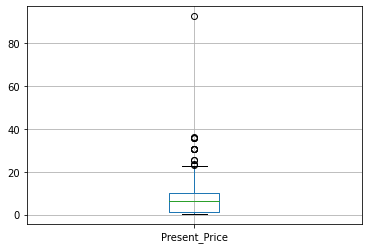

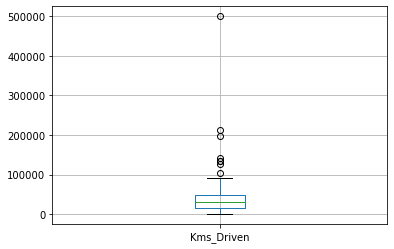

In [144]:
for feature in ['Present_Price',"Kms_Driven"]:
    data.boxplot(column = feature)
    plt.show()

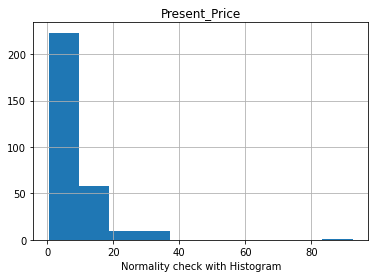

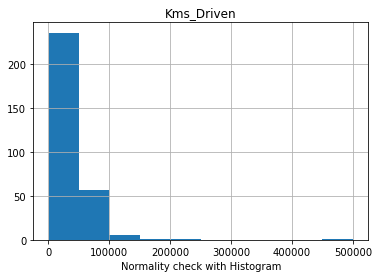

In [145]:
for feature in ['Present_Price',"Kms_Driven"]:
    data.hist(column = feature)
    plt.xlabel("Normality check with Histogram")
    plt.show()
    

From the box plots we can see that we have outliers, we can handle these outliers with help of IQR. We are using IQR because our data is not normally distributed(Retrived from Histogram).


In [146]:
#Creating function for IQR and list storing indices containing outliers
def outliers(dataframe,features):
    Q1 = dataframe[features].quantile(0.25)
    Q3 = dataframe[features].quantile(0.75)
    IQR = Q3 -Q1
    
    lower_bound = Q1 - 1.5* IQR
    upper_bound = Q3 + 1.5*IQR 
    
    ls = dataframe.index[ (dataframe[features] < lower_bound) | (dataframe[features] > upper_bound)]
    return ls

In [147]:
# Creating empty list to store indices of multiple columns
index_list = []
for features in ['Present_Price',"Kms_Driven"]:
    index_list.extend(outliers(data,features))

In [148]:
#Remove Function which return data frame with no outliers
def remove(dataframe,ls):
    ls = sorted(set(ls))
    dataframe = dataframe.drop(ls)
    return dataframe

In [149]:
cleaned_data = remove(data,index_list)
cleaned_data.shape

(282, 8)

Outliers have been removed from our dataset 

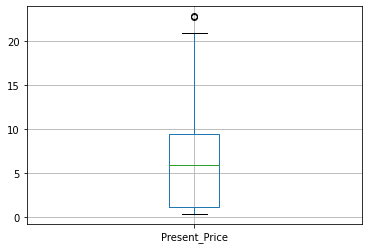

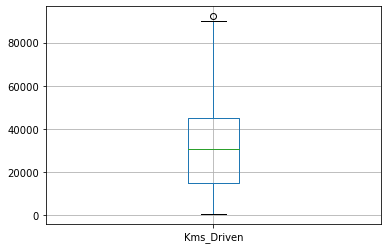

In [150]:
for feature in ['Present_Price',"Kms_Driven"]:
    cleaned_data.boxplot(column = feature)
    plt.show()

In [151]:
[data.shape,cleaned_data.shape]

[(301, 8), (282, 8)]

In [152]:
print('Dimension of data before outliers',data.shape,'Dimension of data after removing outliers',cleaned_data.shape)

Dimension of data before outliers (301, 8) Dimension of data after removing outliers (282, 8)


In [153]:
cleaned_data.describe()

,Selling_Price,Present_Price,Kms_Driven,Owner,No_of_Years
count,282.000000,282.000000,282.000000,282.000000,282.000000
mean,3.934716,6.308830,32244.936170,0.035461,7.244681
std,3.369518,5.176015,21086.819819,0.185271,2.705022
min,0.100000,0.320000,500.000000,0.000000,3.000000
25%,0.785000,1.080000,15000.000000,0.000000,5.000000
50%,3.475000,5.900000,30876.500000,0.000000,7.000000
75%,5.787500,9.400000,45229.500000,0.000000,9.000000
max,18.000000,22.830000,92233.000000,1.000000,18.000000


In [154]:
cleaned_data.sample(5)

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,No_of_Years
199,0.12,0.58,53000,Petrol,Individual,Manual,0,14
273,2.25,7.50,61203,Petrol,Dealer,Manual,0,11
35,2.95,7.74,49998,CNG,Dealer,Manual,0,10
183,0.27,0.47,21000,Petrol,Individual,Manual,0,8
8,8.75,8.89,20273,Diesel,Dealer,Manual,0,5


In [164]:
cleaned_data.columns

Index(['Selling_Price', 'Present_Price', 'Kms_Driven', 'Fuel_Type',
       'Seller_Type', 'Transmission', 'Owner', 'No_of_Years'],
      dtype='object')

We are going to predict the Selling Price of the car with help of other parameters , here we also have categorical instances i.e. Fuel_type , Seller_Type and Tranmission. We should change them into numerical variable which can be done with help of one Label Encoder 

In [166]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

dfle =  cleaned_data
dfle.Seller_Type = le.fit_transform(dfle.Seller_Type)
dfle.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,No_of_Years
0,3.35,5.59,27000,Petrol,0,Manual,0,7
1,4.75,9.54,43000,Diesel,0,Manual,0,8
2,7.25,9.85,6900,Petrol,0,Manual,0,4
3,2.85,4.15,5200,Petrol,0,Manual,0,10
4,4.60,6.87,42450,Diesel,0,Manual,0,7


In [175]:
dfle.Transmission , dfle.Fuel_Type = le.fit_transform(dfle.Transmission) , le.fit_transform(dfle.Fuel_Type)

In [183]:
dfle.sample(6)

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,No_of_Years
206,5.75,7.13,12479,2,0,1,0,4
55,3.60,15.04,70000,2,0,0,0,12
104,1.35,1.47,4100,2,1,1,0,4
75,3.95,6.80,36000,2,0,1,0,6
264,4.00,7.00,40026,2,0,1,0,6
99,9.65,20.45,50024,1,0,1,0,11


In [184]:
for features in ['Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']:
    print(features,dfle[features].unique())

Fuel_Type [2 1 0]
Seller_Type [0 1]
Transmission [1 0]
Owner [0 1]


Now we only have numerical varaible so we can jump for correlation of the data and then  Modeling using Random Forest Regressor Algorithm 

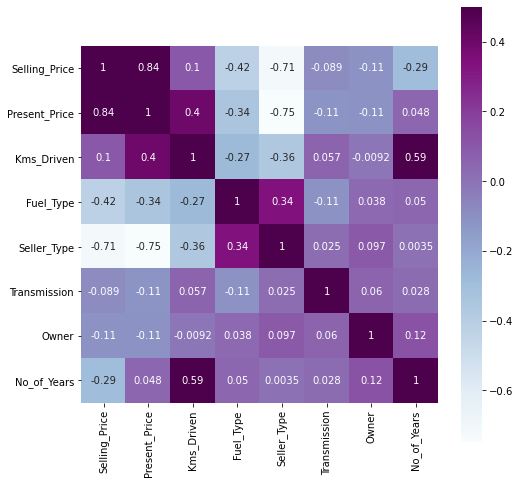

In [189]:
#correlation
plt.figure(figsize=(8,8))
sns.heatmap(dfle.corr(), vmax=.5, square=True, cmap='BuPu', annot=True);

In [190]:
from sklearn.model_selection import train_test_split

X=dfle.drop('Selling_Price', axis=1)
y=dfle['Selling_Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [191]:
#model
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

reg = RandomForestRegressor()
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

Text(0, 0.5, 'Predicting Dataset')

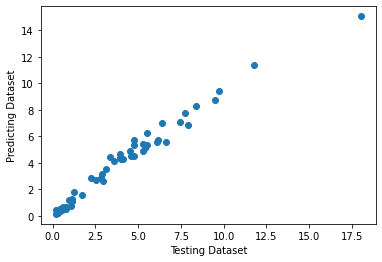

In [193]:
plt.scatter(y_test,y_pred)
plt.xlabel('Testing Dataset')
plt.ylabel('Predicting Dataset')

In [194]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.34911754385964894
MSE: 0.3225611847368415
RMSE: 0.567944702182212
